In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Datasets/MET_weather/hly532.csv", skiprows=23)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1989 00:00,3,0.0,0,6.8,0,5.9,4.7,8.6,87,...,2,5,2,230,10,10,0.0,6000,999,0
1,01-jan-1989 01:00,3,0.0,0,7.9,0,6.4,4.5,8.4,79,...,2,6,2,230,10,0,0.0,8000,999,0
2,01-jan-1989 02:00,3,0.0,0,7.9,0,6.3,4.2,8.3,78,...,2,6,2,220,10,0,0.0,9000,999,0
3,01-jan-1989 03:00,3,0.0,0,7.2,0,6.2,4.9,8.7,85,...,2,5,2,230,10,0,0.0,9000,999,0
4,01-jan-1989 04:00,3,0.0,0,6.2,0,5.5,4.6,8.5,89,...,2,6,2,220,10,0,0.0,9000,999,0


# Cleaning

In [33]:
data2 = data[:10000].copy()
data2.rename(axis="columns", inplace=True,
            mapper={"ind": "irain", 
                    "ind.1": "itemp", 
                    "ind.2": "iwb", 
                    "ind.3": "iwdsp", 
                    "ind.4": "iwddir"})

# Convert types
categorical_cols = ["irain", "itemp", "iwb", "iwdsp", "iwddir", "w", "ww"]
data2[categorical_cols] = data2[categorical_cols].astype(int, errors="ignore").astype("category")

mixed_cols = ["vappr", "rhum", "wddir"]
data2.loc[:, mixed_cols] = data2[mixed_cols].apply(pd.to_numeric, errors="coerce")
data2.loc[:, "date"] = pd.to_datetime(data2["date"])

# Properly label nan values
nan_values = {
    "clht": 999,
    "itemp": 4,
    "iwdsp": 7,
    "iwddir": 7,
}
for col, val in nan_values.items():
    data2.loc[data2[col] == val, col] = np.nan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA370E8828>,
      dtype=object)

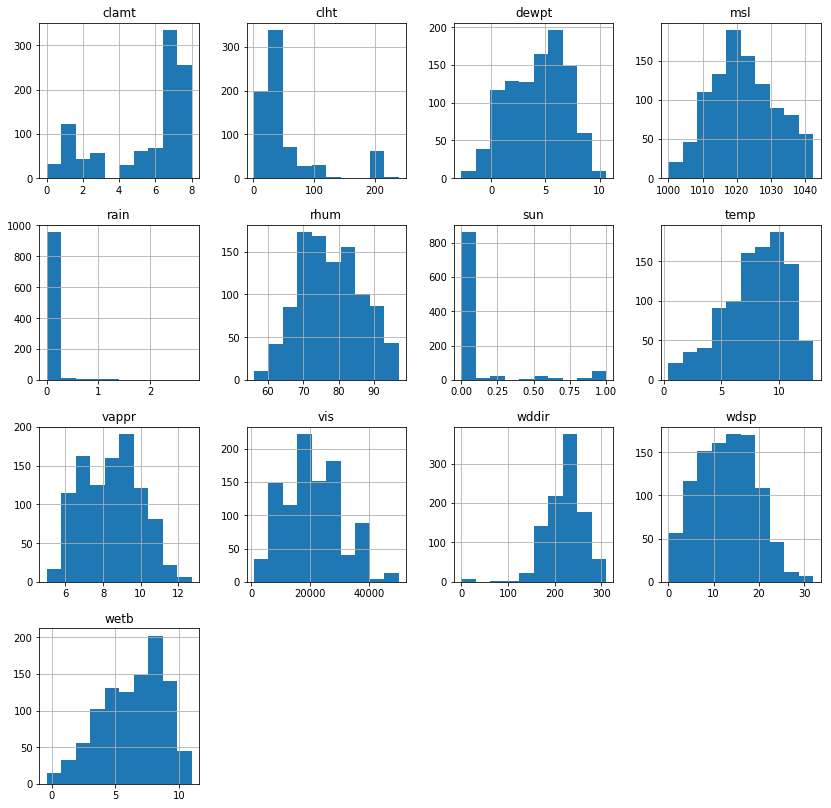

In [4]:
data2.hist(figsize=(14, 14))

# Preprocessing

In [5]:
def norm(df):
    # (X - mean) / std
    nums = df._get_numeric_data()
    nums =  (nums - nums.mean()) / nums.std()
    
    norm_df = df.copy()
    norm_df.loc[:, nums.columns] = nums
    return norm_df

In [37]:
data3 = norm(data2)._get_numeric_data().fillna(0)

# PCA

In [7]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=10)
pca.fit(data3)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
y = pca.transform(data3)
y_df = pd.DataFrame(y, index=data2["date"])

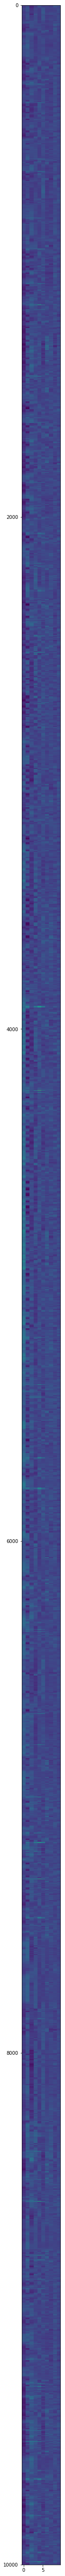

In [40]:
plt.figure(figsize=(15, 100))
plt.imshow(y, aspect=1/15)

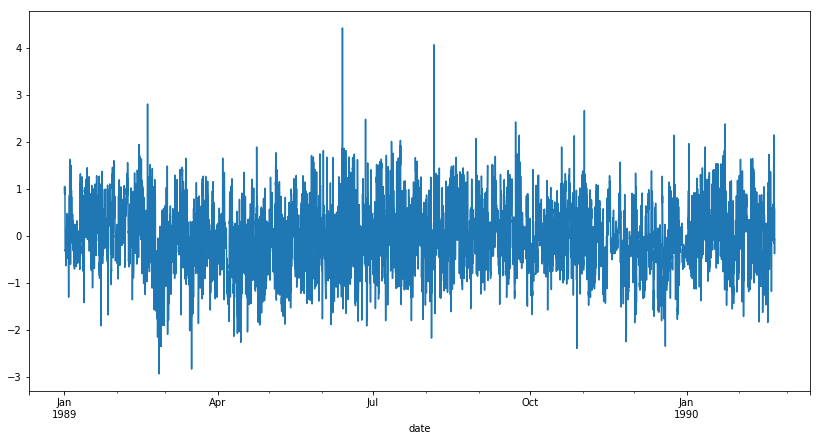

In [22]:
y_df

,0,1,2,3,4,5,6,7,8,9
date,,,,,,,,,,
1989-01-01 00:00:00,1.243636,2.008505,0.478773,-1.618012,0.215132,-0.083783,-1.463946,0.586831,1.260403,-0.362420
1989-01-01 01:00:00,1.076103,1.181500,0.761635,-1.428777,0.413618,-0.401121,-1.484480,0.443805,1.298094,-0.795913
1989-01-01 02:00:00,1.158818,1.054200,0.934885,-1.304838,0.411388,-0.291953,-1.397123,0.326209,1.368503,-0.781066
1989-01-01 03:00:00,1.090607,1.709836,0.453856,-1.646943,0.216553,-0.091710,-1.294773,0.552836,1.342955,-0.542679
1989-01-01 04:00:00,1.404481,2.010360,0.376976,-1.488787,0.029793,0.133106,-1.252501,0.466700,1.404634,-0.051561
1989-01-01 05:00:00,1.666300,2.256278,0.864690,-1.511213,0.101655,0.567086,-0.976955,0.352211,1.414156,-0.284776
1989-01-01 06:00:00,1.716607,2.710671,1.294573,-1.411027,-0.038674,1.372801,-0.741344,0.153022,1.727928,0.196191
1989-01-01 07:00:00,1.528012,2.252448,0.692004,-1.625934,0.109898,0.451546,-1.016446,0.448297,1.362059,-0.387792
1989-01-01 08:00:00,1.786371,2.330444,1.178521,-1.117432,0.061920,0.539868,-0.553836,0.255348,0.890202,0.083501
